## FDA Food Safety Risk Analysis (2008-2022)
**Author:** Md Shafin Ahamed  
**Objective:** To identify the top reasons for food recalls using Python and Natural Language Processing.

In [ ]:
#step 1: Importing Tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Inserting the FILE into the code
file_path = r"D:\DataFiles\food_enforcement.csv"
#Reading File, type=CSV and Encoding ='ISO-8859-1'
df= pd.read_csv(file_path, encoding='ISO-8859-1')

### Data Cleaning & NLP
Using a custom function to categorize around 6,500 unique recall reasons into standard groups (Listeria, Salmonella, Allergens, etc.).

In [ ]:
#step 2: Data cleaning & NPL
def categorize_reason(text):
    text = str(text).lower()
    
    # The Logic Rules (The "Sensors")
    if 'listeria' in text:
        return 'Listeria'
    elif 'salmonella' in text:
        return 'Salmonella'
    elif 'e. coli' in text:
        return 'E. Coli'
    # Grouping all allergy issues together
    elif 'undeclared' in text or 'allergen' in text or 'milk' in text or 'peanut' in text or 'soy' in text:
        return 'Undeclared Allergen'
    # Grouping manufacturing failures
    elif 'gmp' in text or 'manufacturing' in text or 'process' in text:
        return 'GMP/Process Failure'
    # Grouping physical hazards
    elif 'plastic' in text or 'glass' in text or 'metal' in text:
        return 'Physical Contamination'
    else:
        return 'Other/Unknown'

# Create a NEW column called 'short_reason'
df['short_reason'] = df['reason_for_recall'].apply(categorize_reason)

### Visualization
Analyzing the frequency of risk categories.

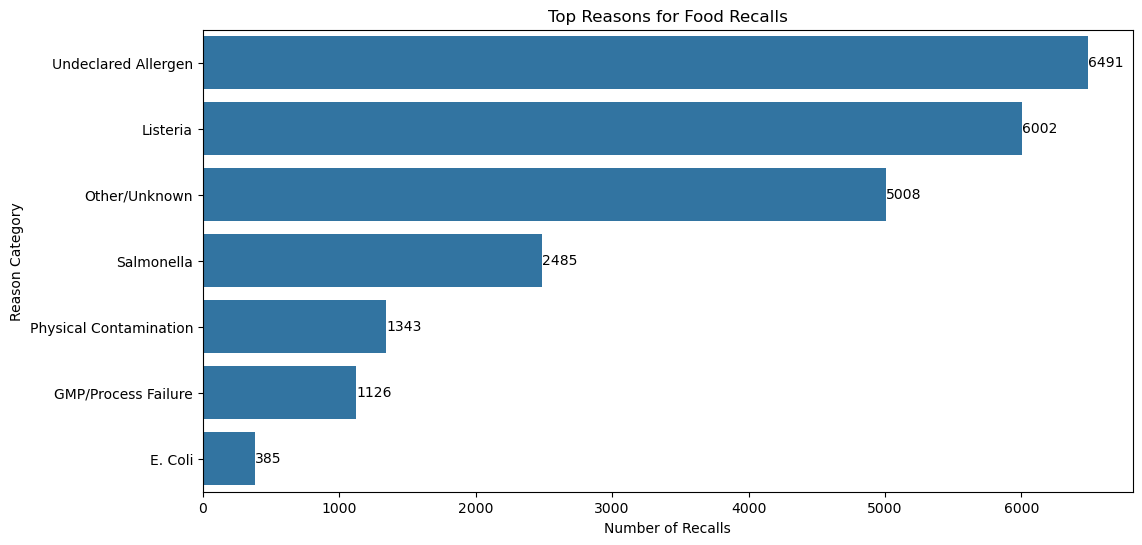

In [68]:
#step 3 : Visualization
#Give a size 
plt.figure(figsize=(12,6))
#countplot for automatic plot
ax= sns.countplot( data= df,
              y= 'short_reason',
              order= df['short_reason'].value_counts().index)
# Loop through the bars and add the numbers
for container in ax.containers:
    ax.bar_label(container)

#the frame work
plt.title('Top Reasons for Food Recalls')
plt.xlabel('Number of Recalls')
plt.ylabel('Reason Category')
plt.savefig("fda_recall_graph.png") #to save the graph as PNG
#display
plt.show()